# Load and weight MRPA data

See variance_v_dna.ipynb for reasoning behind this framework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
def normalized_scores(dna, rna1, rna2, labels):
    rep1, rep2, dna_count = [], [], []
    total_r_rep1, total_r_rep2, total_d = 0, 0, 0
    for i, lines in enumerate(zip(dna, rna1, rna2)[1:]):
        d, r1, r2 = lines
        d_name, d_val   =  d.strip().split()
        r1_name, r1_val = r1.strip().split()
        r2_name, r2_val = r2.strip().split()
        d_val, r1_val, r2_val = map(float, [d_val, r1_val, r2_val])

        assert d_name == r1_name == r2_name == labels[i]

        if d_val < 20:
            rep1      += [0]
            rep2      += [0]
            dna_count += [0]
        else:
            rep1 += [log(r1_val + 1, 2) - log(d_val + 1, 2)]
            rep2 += [log(r2_val + 1, 2) - log(d_val + 1, 2)]
            dna_count += [d_val]
    
            total_r_rep1 += r1_val + 1
            total_r_rep2 += r2_val + 1
            total_d += d_val + 1
    
    rep1 = map(lambda x: x + log(total_d, 2) - log(total_r_rep1, 2), rep1)
    rep2 = map(lambda x: x + log(total_d, 2) - log(total_r_rep2, 2), rep2)
    return rep1, rep2, dna_count


In [3]:
def get_weights(dna_count, rep1, rep2):
    # Fit transform and regressor on valid data
    valid_avg       = [(r1+r2)    / 2 for r1, r2, dna in zip(rep1, rep2, dna_count) if dna > 19]
    valid_variance  = [(r1-r2)**2 / 2 for r1, r2, dna in zip(rep1, rep2, dna_count) if dna > 19]
    valid_dna_count = [dna for dna in dna_count if dna > 19]
    
    print sum(valid_avg) / float(len(valid_avg)), sum(valid_variance) / float(len(valid_variance))
    
    scaler = StandardScaler()
    valid_X = scaler.fit_transform(np.array([valid_dna_count, valid_avg]).T)
    regressor = KNeighborsRegressor(n_neighbors = 200).fit(valid_X, valid_variance)
    
    # Run on complete dataset and then mask nonvalid values
    avg = [(r1+r2) / 2 for r1, r2 in zip(rep1, rep2)]
    X = scaler.transform(np.array([dna_count, avg]).T)
    
    sc = plt.scatter(rep1, rep2, c = regressor.predict(X), s = 5, lw = 0)
    plt.colorbar(sc)
    plt.show()

    return [1 / var if valid else 0 for var, valid in zip(regressor.predict(X), dna_count)]
    

In [4]:
data_dir = '../data/Scaleup_counts_sequences'
promoters = ['minP', 'SV40P']
cell_types = ['HEPG2', 'K562']
designs = ['1', '2']

labels = {}
for design in designs:
    with open("{}/DNACOUNTS/ScaleUpDesign{}_{}_Plasmid.counts".format(data_dir, design, promoters[0])) as _dna:
        _dna.readline()
        labels[design] = []
        for line in _dna:
            labels[design] +=  [line.strip().split()[0]]
            

HEPG2 minP 1
-1.25858933178 2.3950295641


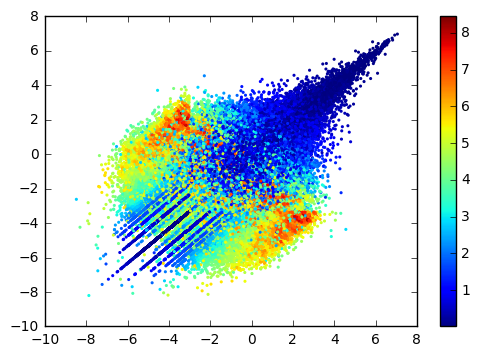

HEPG2 minP 2
-1.13411041901 2.5354531447


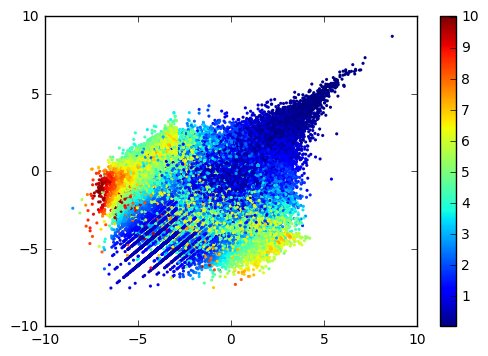

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


K562 minP 1
-2.17780904057 3.58413298455


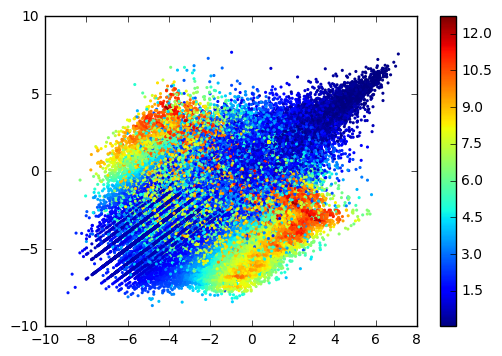

K562 minP 2
-2.19141117155 3.49680962558


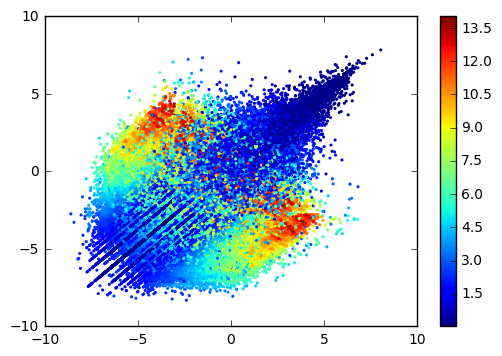

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


HEPG2 SV40P 1
-0.74917841324 1.24413195821


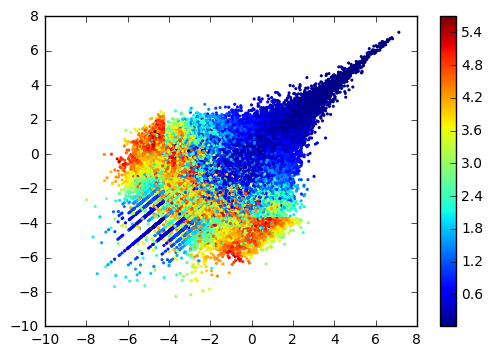

HEPG2 SV40P 2
-0.628652108868 0.89965017135


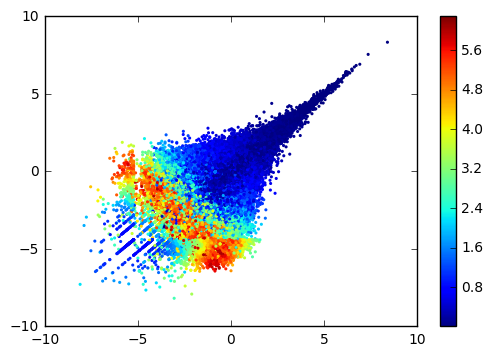

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


K562 SV40P 1
-0.93426995503 1.6679723514


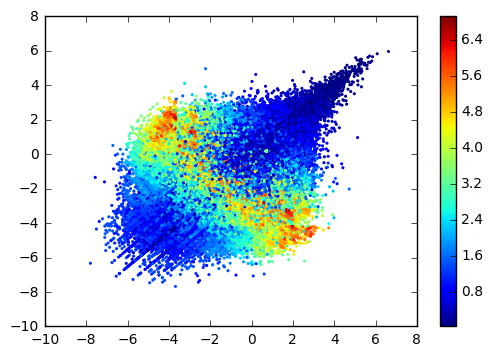

K562 SV40P 2
-1.01318793257 2.10460997467


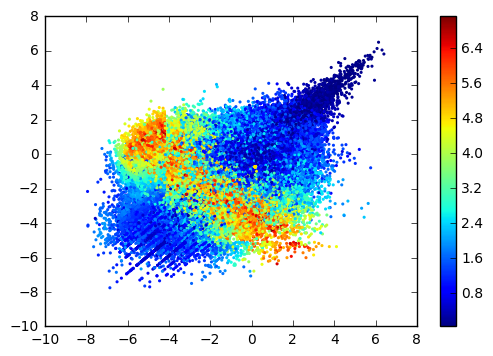

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [5]:
y = []
w = []
for promoter in promoters:
    for cell_type in cell_types:
        merged_y, merged_w = [], []
        for design in ['1', '2']:
            dna = open("{}/DNACOUNTS/ScaleUpDesign{}_{}_Plasmid.counts".format(data_dir, design, promoter))
            rna1 = open("{}/{}/{}_ScaleUpDesign{}_{}_mRNA_Rep1.counts".format(
                data_dir, cell_type, cell_type, design, promoter))
            rna2 = open("{}/{}/{}_ScaleUpDesign{}_{}_mRNA_Rep2.counts".format(
                data_dir, cell_type, cell_type, design, promoter))
            print cell_type, promoter, design
            rep1, rep2, dna_count = normalized_scores(dna, rna1, rna2, labels[design])
            
            merged_y += [(r1 + r2) / 2 for r1, r2 in zip(rep1, rep2)]
            merged_w += get_weights(dna_count, rep1, rep2)

            dna.close()
            rna1.close()
            rna2.close()
        scaler = StandardScaler().fit([val for val, weight in zip(merged_y, merged_w) if weight != 0])
        y += [list(scaler.transform(np.array(merged_y)))]
        w += [merged_w]
y = np.array(y).T
w = np.array(w).T

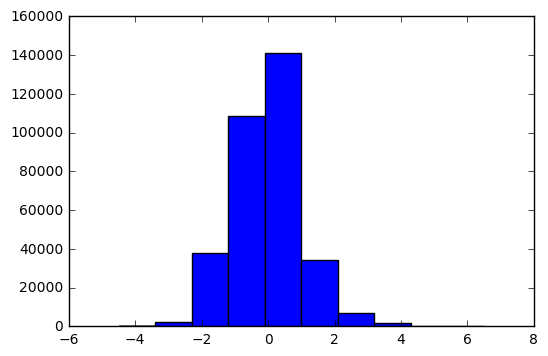

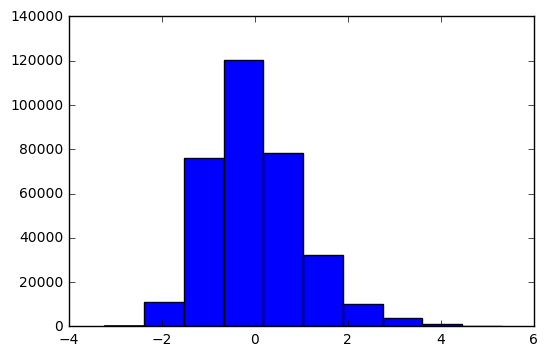

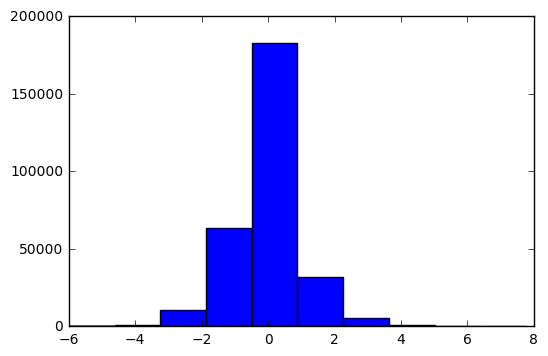

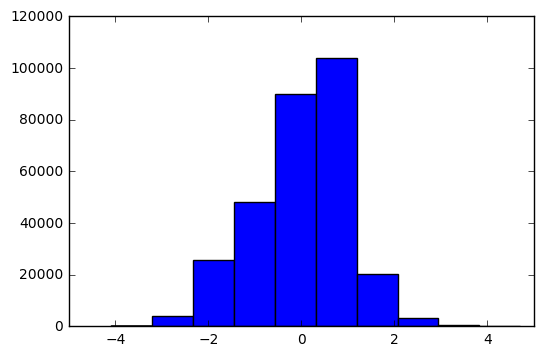

In [6]:
for i in range(4):
    plt.hist([val for val, weight in zip(y[:, i], w[:, i]) if weight != 0])
    plt.show()

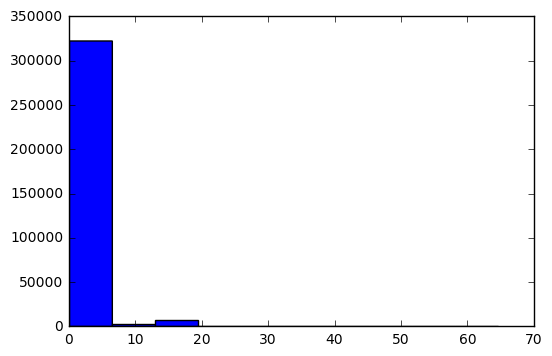

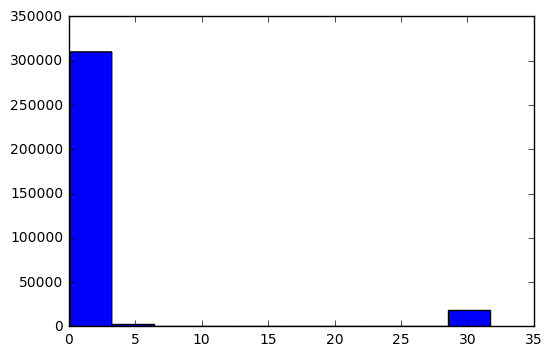

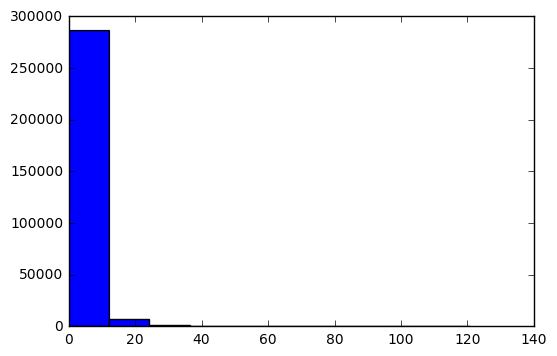

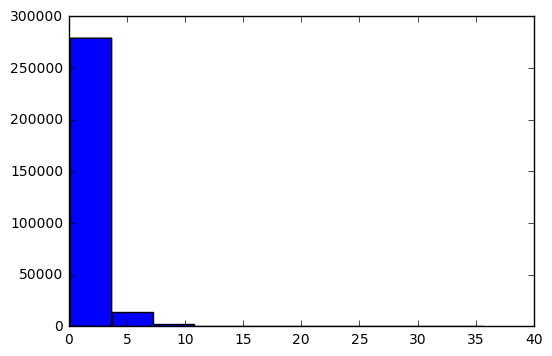

In [7]:
for i in range(4):
    plt.hist([weight for val, weight in zip(y[:, i], w[:, i]) if weight != 0])
    plt.show()

In [8]:
seqs = []
for design in designs:
    with open("../data/Scaleup_counts_sequences/ScaleUpDesign{}.sequences.txt".format(design)) as f:
        for i, line in enumerate(f):
            key, seq = line.strip().split()     
            assert key == labels[design][i]
            if 'N' in seq: seq = seq.replace('N', 'A')
            seqs += [seq]

In [9]:
# One hot encode DNA sequences the standard way.
bases = ['A', 'T', 'C', 'G']

def one_hot_encode_seq(seq):
    result = np.zeros((len(bases), len(seq)))
    for i, base in enumerate(seq):
        result[bases.index(base), i] = 1
    return result

def seqs_to_encoded_matrix(seqs):
    # Wrangle the data into a shape that Dragonn wants.
    result = np.concatenate(
        map(one_hot_encode_seq, seqs)
    ).reshape(
        len(seqs), 1, len(bases), len(seqs[0])
    )
    return result

X = seqs_to_encoded_matrix(seqs)

In [10]:
merged = w.min(axis=1)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid, w_train, w_valid = train_test_split(
    X, y, w, test_size=0.2, random_state=42
)

In [11]:
from models import SequenceDNN_Regression

model = SequenceDNN_Regression(
        seq_length=X_train.shape[3],
        num_filters=[100, 100],
        conv_width=[13, 13],
        pool_width=40,
        dropout=0.1
    )
#        num_tasks=y_train.shape[1],
#        dropout=0.1
#    )

/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5005)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [33]:
valid = [i for i, val in enumerate(w_train[:,0]) if val > 1]
valid_valid = [i for i, val in enumerate(w_valid[:,0]) if val > 1]
model.train(X_train[valid,:,:,:], y_train[valid, 0].reshape(len(valid), 1),
            (X_valid[valid_valid, :, :, :], y_valid[valid_valid,0].reshape(len(valid_valid), 1)),
            train_sample_weight=w_train[valid,0], valid_sample_weight=w_valid[valid_valid,0])

Training model (* indicates new best result)...
Epoch 1:
Train Mean Squared Error: 0.2937	Mean Absolute Error: 0.3787	 Median Absolute Error: 0.3705	 R2 Score: 0.9092
Valid Mean Squared Error: 1.1249	Mean Absolute Error: 0.7906	 Median Absolute Error: 0.5243	 R2 Score: 0.6491 *
Epoch 2:
Train Mean Squared Error: 0.3043	Mean Absolute Error: 0.3945	 Median Absolute Error: 0.3781	 R2 Score: 0.9059
Valid Mean Squared Error: 1.1392	Mean Absolute Error: 0.8051	 Median Absolute Error: 0.5320	 R2 Score: 0.6446
Epoch 3:
Train Mean Squared Error: 0.3247	Mean Absolute Error: 0.4097	 Median Absolute Error: 0.4107	 R2 Score: 0.8996
Valid Mean Squared Error: 1.1058	Mean Absolute Error: 0.8032	 Median Absolute Error: 0.5693	 R2 Score: 0.6550 *
Epoch 4:
Train Mean Squared Error: 0.2936	Mean Absolute Error: 0.3808	 Median Absolute Error: 0.3768	 R2 Score: 0.9092
Valid Mean Squared Error: 1.1057	Mean Absolute Error: 0.7899	 Median Absolute Error: 0.5395	 R2 Score: 0.6551 *
Epoch 5:
Train Mean Squared Er

In [15]:
import matplotlib.gridspec as gridspec

def print_perf(model, metric):
    train_losses, valid_losses = [np.array([epoch_metrics[metric] for epoch_metrics in metrics])
                                  for metrics in (model.train_metrics, model.valid_metrics)]

    # Pretty sure early stopping works by taking the mean of losses, might want to double check
    mean_train_losses = train_losses.mean(axis=1)
    mean_valid_losses = valid_losses.mean(axis=1)
    min_loss_indx = min(enumerate(mean_valid_losses), key=lambda x: x[1])[0]
    
    gs = gridspec.GridSpec(3, 2)
    f = plt.figure(figsize=(15,10))

    for i in range(train_losses.shape[1]):
        y_max = max(max(train_losses[:,i]), max(valid_losses[:,i])) * 1.1

        ax = f.add_subplot(gs[i])

        ax.plot(range(len(train_losses[:,i])), train_losses[:,i], label='Training',lw=2)
        ax.plot(range(len(train_losses[:,i])), valid_losses[:,i], label='Validation', lw=2)
        
        ax.plot([min_loss_indx, min_loss_indx], [0, y_max], 'k--', label='Early Stop')
        if i == 0:
            ax.legend(loc="best")
            ax.set_ylabel(metric)
        ax.set_ylim((0,y_max))
        ax.set_title("Task {}".format(i))

    y_max = max(max(mean_train_losses), max(mean_valid_losses)) * 1.1

    ax = f.add_subplot(gs[train_losses.shape[1]])
    ax.plot(range(len(mean_train_losses)), mean_train_losses, label='Training',lw=2)
    ax.plot(range(len(mean_valid_losses)), mean_valid_losses, label='Validation', lw=2)
        
    ax.plot([min_loss_indx, min_loss_indx], [0, y_max], 'k--', label='Early Stop')
    ax.set_ylim((0,y_max))
    ax.set_xlabel("Epoch")
    ax.set_title("Mean losses")
        
    plt.savefig(fn + ".losses.png")
    plt.show()

NameError: global name 'fn' is not defined

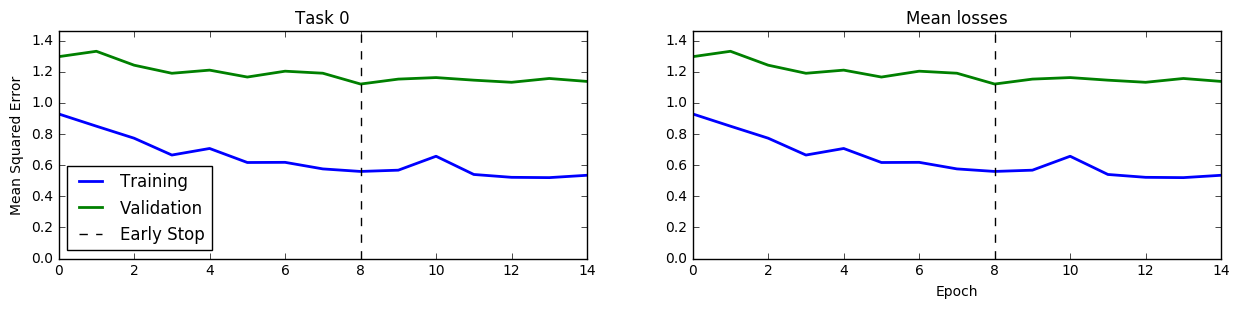

In [16]:
metric = "Mean Squared Error"
print_perf(model, metric)

In [17]:
predictions = model.predict(X_valid)

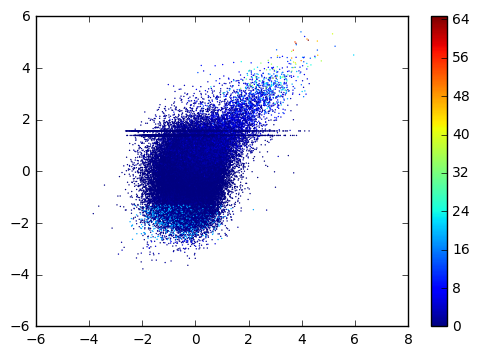

In [35]:
sc = plt.scatter(predictions[:, 0], y_valid[:, 0], c = w_valid[:, 0], s = 1, lw=0)
plt.colorbar(sc)
plt.show()